In [4]:
import pandas as pd
#import swifter
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('diabetic_data.csv')
df.shape

(101766, 50)

In [5]:
import swifter

In [6]:
df1=pd.DataFrame(df.isna().sum())
df1=df1.reset_index()
df1.columns=['Column_Names','Count_of_Nan_Values']
df2=df1[df1['Count_of_Nan_Values']!=0].sort_values(by=['Count_of_Nan_Values'],ascending=False)
df2['Percentage_of_NAN']=df2['Count_of_Nan_Values']/len(df)*100
print('The Nan Value columns with percentage are as follows')
print(df2)

The Nan Value columns with percentage are as follows
Empty DataFrame
Columns: [Column_Names, Count_of_Nan_Values, Percentage_of_NAN]
Index: []


In [7]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Replacing Question Mark with NAN

In [8]:
import numpy as np
df.replace({'?':np.nan},inplace=True)
df1=pd.DataFrame(df.isna().sum())
df1=df1.reset_index()
df1.columns=['Column_Names','Count_of_Nan_Values']
df2=df1[df1['Count_of_Nan_Values']!=0].sort_values(by=['Count_of_Nan_Values'],ascending=False)
df2['Percentage_of_NAN']=df2['Count_of_Nan_Values']/len(df)*100
print('The Nan Value columns with percentage are as follows')
print(df2)

The Nan Value columns with percentage are as follows
         Column_Names  Count_of_Nan_Values  Percentage_of_NAN
5              weight                98569          96.858479
11  medical_specialty                49949          49.082208
10         payer_code                40256          39.557416
2                race                 2273           2.233555
20             diag_3                 1423           1.398306
19             diag_2                  358           0.351787
18             diag_1                   21           0.020636


# EDA and Data Cleaning

In [9]:
#Dropping columns with more than 40 percent null values
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)
#Changing the readmitted column
df['readmitted'] = df['readmitted'].replace({'>30':1,'<30':1,'NO':0})
#Replacing Age with mean
df['age'] = df['age'].replace({'[70-80)': 75, '[60-70)': 65, '[50-60)': 55, '[80-90)': 85, '[40-50)': 45, '[30-40)': 35, '[90-100)': 95, '[20-30)': 25, '[10-20)': 15, '[0-10)': 5})

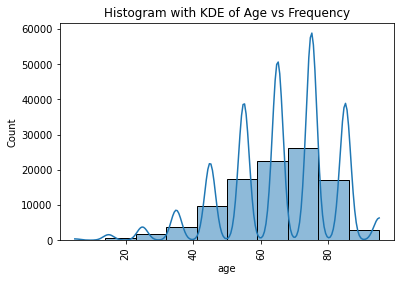

In [10]:
sns.histplot(df['age'],kde=True,bins=10)
plt.title('Histogram with KDE of Age vs Frequency')
plt.xticks(rotation=90);

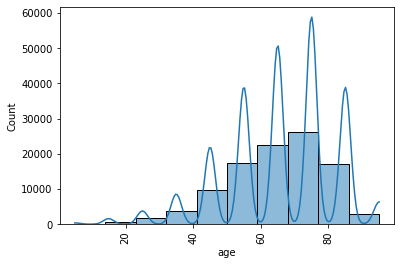

In [11]:
sns.histplot(df['age'],kde=True,bins=10)
plt.xticks(rotation=90);

# Checking the distribution of Age

In [19]:
from scipy.stats import shapiro
#The Shapiro-Wilk test (often referred to as the Shapiro test) 
#is a statistical test used to assess whether a set of data follows a normal distribution
stat,p = shapiro(df['age'])
alpha = 0.05
#Checking the signiface value
if p > alpha:
    #The Null hypothesis is a distribution sample is Normally distributed
    print('Sample seems Gaussian (fail to reject H0)')
    #The Alternate hypothesis is a distribution is not normally distributed
else:
    print('Sample does not seems Gaussian (reject H0)')


Sample does not seems Gaussian (reject H0)


/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [12]:
from scipy.stats import chisquare
from numpy.random import poisson
chi_statistic, p_value = chisquare(df['age'])
alpha = 0.05
if p_value > alpha:
    print('Sample follows a Poisson distribution (fail to reject H0)')
else:
    print('Sample does not follow a Poisson distribution (reject H0)')

Sample does not follow a Poisson distribution (reject H0)


In [13]:
from scipy.stats import skewtest
#The skewtest is a statistical test that is used to assess
#whether a set of data is symmetric or skewed.
#The test is based on the comparison of the observed skewness 
#of data to the expected skewness under the assumption of normality. 
statistic, p_value = skewtest(df['age'])
alpha = 0.05
#Checking the significance value
if p_value > alpha:
    #Null hypothesis is data is not skewed
   print('Sample is symmetric (fail to reject H0)')
    #Alternate hypothesis is data is skewed
else:
   print('Sample is skewed (reject H0)')


Sample is skewed (reject H0)


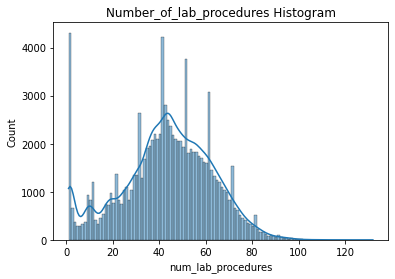

In [14]:
sns.histplot(df['num_lab_procedures'],kde=True);
plt.title('Number_of_lab_procedures Histogram')
plt.show()

In [15]:
from scipy.stats import shapiro
stat, p = shapiro(df['num_lab_procedures'])
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Sample does not look Gaussian (reject H0)


/N/soft/rhel7/python/3.9.8/lib/python3.9/site-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [16]:
from scipy.stats import skewtest
statistic, p_value = skewtest(df['num_lab_procedures'])
alpha = 0.05
if p_value > alpha:
   print('Sample is symmetric (fail to reject H0)')
else:
   print('Sample is skewed (reject H0)')

Sample is skewed (reject H0)


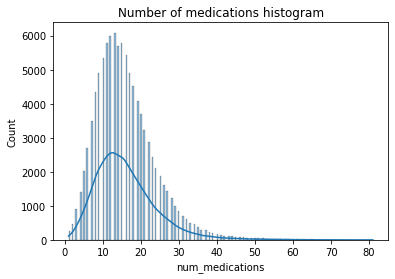

In [17]:
sns.histplot(df['num_medications'],kde=True)
plt.title('Number of medications histogram')
plt.show()

In [18]:
from scipy.stats import skewtest
statistic, p_value = skewtest(df['num_medications'])
alpha = 0.05
if p_value > alpha:
   print('Sample is symmetric (fail to reject H0)')
else:
   print('Sample is skewed (reject H0)')

Sample is skewed (reject H0)


In [19]:
import numpy as np
import scipy.stats as stats
skewness = stats.skew(df['num_medications'])
print("Skewness:", skewness)
if skewness > 0:
    print("The distribution is normal distribution with right-tailed.")
else:
    print("The distribution is not right-tailed.")


Skewness: 1.3266525795561763
The distribution is normal distribution with right-tailed.


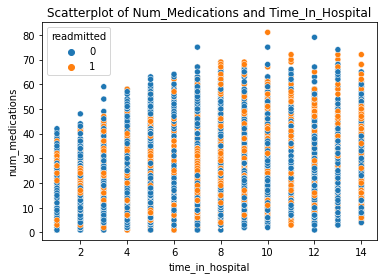

In [20]:
sns.scatterplot(data=df, y='num_medications', x='time_in_hospital', hue='readmitted');
plt.title('Scatterplot of Num_Medications and Time_In_Hospital')
plt.show()

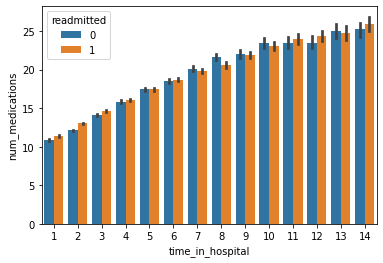

In [21]:
sns.barplot(data=df, x='time_in_hospital', y='num_medications', hue='readmitted');

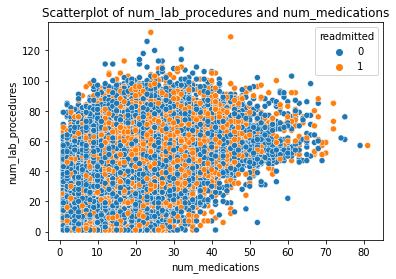

In [22]:
sns.scatterplot(data=df, x='num_medications', y='num_lab_procedures', hue='readmitted')
plt.title('Scatterplot of num_lab_procedures and num_medications')
plt.show()

In [23]:
df.corr()[['num_lab_procedures','num_medications']].loc[['time_in_hospital','num_lab_procedures']]

,num_lab_procedures,num_medications
time_in_hospital,0.31845,0.466135
num_lab_procedures,1.00000,0.268161


In the first scatter plot, we can observe that there is a weak positive relationship between time_in_hospital and num_medications. We can also see that most of the data points are concentrated in the lower range of time_in_hospital and num_medications. Additionally, we can see that the readmitted variable does not seem to have a strong relationship with either variable.

In the second scatter plot, we can observe that there is a weak positive relationship between num_medications and num_lab_procedures. We can also see that most of the data points are concentrated in the lower range of num_medications and num_lab_procedures. Additionally, we can see that the readmitted variable does not seem to have a strong relationship with either variable.

Overall, the scatter plots suggest that there is a weak positive relationship between the variables, but it is not a strong relationship. Additionally, the readmitted variable does not seem to be strongly related to either variable. However, further analysis and statistical tests may be necessary to confirm these observations.

# Feature Selection before Applying K Means ALgorithm

In [24]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [33]:
df_diabetes=df.copy()

# Eliminating patient_nbr and encounter_id

In [34]:
#Eliminating encounter_id and patient_nbr
#Since K means clustering works on similarity or difference and the objective of K means is to cluster records hence
#Presence of a unique key will be meaningless and hence it wont contribute to the clustering
#Remove Id variables as they dont contribute to clustering
df_diabetes.drop(columns=['encounter_id','patient_nbr'],axis=1,inplace=True)

# Checking categorical and Continous Features

In [35]:
num_features = df_diabetes.select_dtypes(include=['int', 'float'])
df_diabetes.head(10)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,5,6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,15,1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,AfricanAmerican,Female,25,1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,35,1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,45,1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,0
5,Caucasian,Male,55,2,1,2,3,31,6,16,...,No,Steady,No,No,No,No,No,No,Yes,1
6,Caucasian,Male,65,3,1,2,4,70,1,21,...,No,Steady,No,No,No,No,No,Ch,Yes,0
7,Caucasian,Male,75,1,1,7,5,73,0,12,...,No,No,No,No,No,No,No,No,Yes,1
8,Caucasian,Female,85,2,1,4,13,68,2,28,...,No,Steady,No,No,No,No,No,Ch,Yes,0
9,Caucasian,Female,95,3,3,4,12,33,3,18,...,No,Steady,No,No,No,No,No,Ch,Yes,0


In [36]:
cat_features = df_diabetes.select_dtypes(include=['object']).columns
print(cat_features)

Index(['race', 'gender', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')


# Taking Value counts on dataset

In [37]:
for column in cat_features:
    #Taking Value counts for each categorical column
    value_counts = df_diabetes[column].value_counts()
    prop_percentage=value_counts/len(df_diabetes) *100
    #Setting threshold to 95 percentage, So if a class in a column has more than 95 percent values we
    imbalanced_values=prop_percentage>95
    if not imbalanced_values.empty:
        print(f"Column {column} has imbalanced classes:")
        print(prop_percentage[imbalanced_values])

Column race has imbalanced classes:
Series([], Name: race, dtype: float64)
Column gender has imbalanced classes:
Series([], Name: gender, dtype: float64)
Column diag_1 has imbalanced classes:
Series([], Name: diag_1, dtype: float64)
Column diag_2 has imbalanced classes:
Series([], Name: diag_2, dtype: float64)
Column diag_3 has imbalanced classes:
Series([], Name: diag_3, dtype: float64)
Column max_glu_serum has imbalanced classes:
Series([], Name: max_glu_serum, dtype: float64)
Column A1Cresult has imbalanced classes:
Series([], Name: A1Cresult, dtype: float64)
Column metformin has imbalanced classes:
Series([], Name: metformin, dtype: float64)
Column repaglinide has imbalanced classes:
No    98.487707
Name: repaglinide, dtype: float64
Column nateglinide has imbalanced classes:
No    99.3092
Name: nateglinide, dtype: float64
Column chlorpropamide has imbalanced classes:
No    99.915492
Name: chlorpropamide, dtype: float64
Column glimepiride has imbalanced classes:
Series([], Name: gli

# Reasons for dropping Imbalanced data
If a column in a dataset has the same value for all data points,it will not be useful for clustering. 
This is because clustering algorithms rely on differences or similarities between data points to group them into clusters.
When a column has the same value for greater than 95 percent of datapoints, There is less variability in those datapoints which will introduce Skewness in the clustering process.
Additionally,it means that this column provides no useful information for distinguishing between data points.
Since K-Means is a distance based clustering algorithm,columns having less variability will dominate the results and hence other seemingly important columns will have less impact.



In [38]:
imbalanced_data=['examide','metformin-rosiglitazone','metformin-pioglitazone','glimepiride-pioglitazone','glipizide-metformin','glyburide-metformin','citoglipton','tolazamide','troglitazone','miglitol','acarbose','tolbutamide','acetohexamide','chlorpropamide','nateglinide','repaglinide']
df_diabetes.drop(columns=imbalanced_data,inplace=True)

# Handling other categorical variables
Since the other columns have a particular order in the dosage/Value we can perform label encoding to these columns, An example is shown by the value counts of Max_glu_serum Column
None    96420
Norm     2597
greater than 200     1485
greater than 300     1264
Hence we can do label encoding and this wont affect the distance meteric since the values are determined by types as mentioned above with None being mapped to 0

In [39]:
#Label Encoding in data where there is a ordinality
from sklearn.preprocessing import LabelEncoder
ordinal_columns=['max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed']
df_diabetes[['max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed']] = df_diabetes[['max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed']].swifter.apply(LabelEncoder().fit_transform)

Pandas Apply:   0%|          | 0/11 [00:00<?, ?it/s]

# Working on other columns 

In [40]:
#Working on Data Classification for remaining columns
df_diabetes = df_diabetes.drop(df_diabetes.loc[df_diabetes["gender"]=="Unknown/Invalid"].index, axis=0)

In [41]:
ordinal_columns=['gender','race']
one_hot = pd.get_dummies(df_diabetes[['gender','race']])
df_diabetes=pd.concat([df_diabetes,one_hot],axis=1)


# Reasons for Eliminating three columns diag_1,diag_2,diag_3
The diag_1, diag_2, and diag_3 columns in the Diabetes dataset contain the ICD-9 codes for the primary, secondary, and additional diagnoses of the patients. Each ICD-9 code corresponds to a specific medical condition or diagnosis, and there are thousands of possible codes.
Including these columns in the clustering analysis can result in a high-dimensional dataset with a large number of unique values, which can make it difficult to identify meaningful clusters or interpret the results. Moreover, the presence of these columns can lead to overfitting, as the clustering algorithm may focus too much on these columns and generate clusters based on ICD-9 codes rather than underling patterns in the data

In [42]:
df_diabetes.drop(columns=['diag_1','diag_2','diag_3','gender','race'],inplace=True)

In [43]:
df_diabetes_final=df_diabetes.copy()

In [255]:
df_diabetes_final.shape

(101763, 31)

# K-MEANS Using Tou 

In [441]:

import numpy as np
import swifter
from scipy.spatial.distance import euclidean

         
def get_random_centroids(input_dataframe,no_of_clusters):
    '''
    The function takes a dataframe as an input and creates a random K centroids from uniform distribution
    '''
    #Initialize random centroids from dataset
    list_of_centroids = []
    
    for cluster in range(no_of_clusters):
        #Generates a centroids randomly from uniform distribution 
        random_centroid = input_dataframe.swifter.apply(lambda x:float(x.sample()))
        #From the given dataset it randomly selects centroids
        list_of_centroids.append(random_centroid)
    
    centroid_df=pd.concat(list_of_centroids,axis=1)
    #Naming the column as Label for ease of purpose
    centroid_df.index.name='Cluster_Assigned'
    '''
    The function returns a dataframe consisting of no of clusters required
    '''
    return centroid_df

def get_labels(input_dataframe,centroid_df):
    '''
    This function takes centroids as input and takes the initial dataframe and gives them labels to which cluster
    they belong to
    '''
    euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
    #Here we use idxmin functionality to handle ties in the dataset 
    #and it randomly assigns if euclideab distance results in a tie
    '''
    This function returns the index of minimum distances as a dataframe
    '''
    return pd.DataFrame(euclidean_distances.idxmin(axis=1))

        
def get_new_centroids(df_clustered_label,input_dataframe):
    '''
    The input dataframe is the dataframe with clusters labelled and the original dataframe
    '''
    df_original_label_join=input_dataframe.join(df_clustered_label)
    #This is a dataframe that consists of datapoints as well as the cluster assigned 
    df_original_label_join.rename(columns={0:'Cluster_Assigned'},inplace=True)
    #To get the new centroids we group by the Label column and take its mean
    new_centroids=df_original_label_join.groupby('Cluster_Assigned').mean()
    #Here transpose is taken to maintain consistency between original random centroids and 
    return new_centroids.T

def kmeans_llyod(input_dataframe,no_of_clusters,threshold,no_of_iterations):
    '''
    This function takes original dataframe,number of clusters,threshold as input.
    '''
    iteration=0
    #Step 1 of k means is to get random _Centroids
    initial_centroid=get_random_centroids(input_dataframe,no_of_clusters)
    #Randomly generated centroids would be stored on centroids 
    #Storing the column list to handle K ties 
    initial_centroid_column_list=initial_centroid.columns.to_list()
    
    while True:
        '''
        The while loop runs until convergence condition is met
        '''
        df_cluster_label=get_labels(input_dataframe,initial_centroid)
        df_new_centroids=get_new_centroids(df_cluster_label,input_dataframe)
        '''
        Handling (Maintaining K Centroids)
        '''
        new_list_of_columns=df_new_centroids.columns.to_list()
        #Keeping the number of clusters same
        initial_set_columns = set(initial_centroid_column_list)
        new_set_columns = set(new_list_of_columns)
        missing_columns = initial_set_columns - new_set_columns
        for col in missing_columns:
            df_new_centroids[col]=initial_centroid[col]
        
        from scipy.spatial.distance import euclidean
        scalar_product = [euclidean(initial_centroid[col],df_new_centroids[col]) for col in initial_centroid.columns]
        threshold_calculated=float(sum(scalar_product))/no_of_clusters
        
        iteration+=1
        
        if threshold_calculated<threshold:
            print("The input Threshold was {}".format(threshold))
            print("The calculated threshold is {}".format(threshold_calculated))
        
        if iteration>no_of_iterations:
            print("Limit for iterations has exceeded")
        
        if threshold_calculated<threshold or iteration>no_of_iterations:
            return df_new_centroids
            break
        else:
            initial_centroid= df_new_centroids
        
        

# Error with Target Variable 

In [483]:

import numpy as np
import swifter
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
import time

         
def get_random_centroids(input_dataframe,no_of_clusters):
    '''
    The function takes a dataframe as an input and creates a random K centroids from uniform distribution
    '''
    #Initialize random centroids from dataset
    list_of_centroids = []
    
    for cluster in range(no_of_clusters):
        #Generates a centroids randomly from uniform distribution 
        random_centroid = input_dataframe.swifter.apply(lambda x:float(x.sample()))
        #From the given dataset it randomly selects centroids
        list_of_centroids.append(random_centroid)
    
    centroid_df=pd.concat(list_of_centroids,axis=1)
    #Naming the column as Label for ease of purpose
    centroid_df.index.name='Cluster_Assigned'
    '''
    The function returns a dataframe consisting of no of clusters required
    '''
    return centroid_df

def get_labels(input_dataframe,centroid_df):
    '''
    This function takes centroids as input and takes the initial dataframe and gives them labels to which cluster
    they belong to
    '''
    euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
    #Here we use idxmin functionality to handle ties in the dataset 
    #and it randomly assigns if euclideab distance results in a tie
    '''
    This function returns the index of minimum distances as a dataframe
    '''
    return pd.DataFrame(euclidean_distances.idxmin(axis=1))

        
def get_new_centroids(df_clustered_label,input_dataframe):
    '''
    The input dataframe is the dataframe with clusters labelled and the original dataframe
    '''
    df_original_label_join=input_dataframe.join(df_clustered_label)
    #This is a dataframe that consists of datapoints as well as the cluster assigned 
    df_original_label_join.rename(columns={0:'Cluster_Assigned'},inplace=True)
    #To get the new centroids we group by the Label column and take its mean
    new_centroids=df_original_label_join.groupby('Cluster_Assigned').mean()
    #Here transpose is taken to maintain consistency between original random centroids and 
    return new_centroids.T


def kmeans_llyod(input_dataframe,no_of_clusters,threshold,no_of_iterations):
    '''
    This function takes original dataframe,number of clusters,threshold as input.
    '''
    start_time=time.time()
    iteration=0
    #Step 1 of k means is to get random _Centroids
    initial_centroid=get_random_centroids(input_dataframe,no_of_clusters)
    #Randomly generated centroids would be stored on centroids 
    #Storing the column list to handle K ties 
    initial_centroid_column_list=initial_centroid.columns.to_list()
    
    while True:
        '''
        The while loop runs until convergence condition is met
        '''
        df_cluster_label=get_labels(input_dataframe,initial_centroid)
        df_new_centroids=get_new_centroids(df_cluster_label,input_dataframe)
        '''
        Handling (Maintaining K Centroids)
        '''
        new_list_of_columns=df_new_centroids.columns.to_list()
        #Keeping the number of clusters same
        initial_set_columns = set(initial_centroid_column_list)
        new_set_columns = set(new_list_of_columns)
        missing_columns = initial_set_columns - new_set_columns
        for col in missing_columns:
            df_new_centroids[col]=initial_centroid[col]
        
        from scipy.spatial.distance import euclidean
        scalar_product = [euclidean(initial_centroid[col],df_new_centroids[col]) for col in initial_centroid.columns]
        threshold_calculated=float(sum(scalar_product))/no_of_clusters
        
        iteration+=1
        
        if threshold_calculated<threshold:
            print("The input Threshold was {}".format(threshold))
            print("The calculated threshold is {}".format(threshold_calculated))
        
        if iteration>no_of_iterations:
            print("Limit for iterations has exceeded")
        
        if threshold_calculated<threshold or iteration>no_of_iterations:
            error=cluster_error_target_variable(df_cluster_label,input_dataframe,no_of_clusters,df_new_centroids)
            sum_of_square_error=sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters)
            end_time=time.time()
            return df_new_centroids,error,sum_of_square_error,end_time-start_time
            break
        else:
            initial_centroid= df_new_centroids
        

def sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters):
    '''
    This function calculates the euclidean distance between new formed 
    centroids and the datapoints in that cluster
    '''
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)
    total_error=[]
    for cluster in range(no_of_clusters):
        df_data_label_cluster=df_data_label[df_data_label['Cluster_Assigned']==cluster]
        df_data_label_cluster=df_data_label_cluster.drop('Cluster_Assigned',axis=1)
        centroids=pd.DataFrame(df_new_centroids[cluster])
        euclidean_distance=cdist(df_data_label_cluster,centroids.T,metric='euclidean')
        total_error.append(sum(euclidean_distance))
    return round(float(''.join(map(str, sum(total_error)))),3)
        
        
        
def cluster_error_target_variable(df_cluster_label,input_dataframe,no_of_clusters,df_new_centroids):
    '''
    This calculates the error for every cluster and sums up the error based on the formula for error
    '''
    
    target_variable_centroid=input_dataframe.groupby('readmitted').mean().reset_index()
    '''
    Target variable centroid is input dataframe taking mean
    '''
    new_centroids= df_new_centroids.T
    #
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)

    # Get the columns of the data dataframe
    columns = input_dataframe.columns

    sum_of_square_Error= []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):   
        s=[]
        for j in range(len(target_variable_centroid)): ### mean centroid
            #Calculating the error between target variable centroid and new centroids
            distance = np.sum(np.square(target_variable_centroid[target_variable_centroid['readmitted']==j][columns] - new_centroids.iloc[i][columns]), axis=1)
            #Storing the distance
            s.append(distance.iloc[0])
        sum_of_square_Error.append(s)
    
    
    merged_new_label=pd.DataFrame(sum_of_square_Error).idxmin(axis=1)
    
    #Merging of cluster
    mapping_dictionary=merged_new_label.to_dict() 
    
    #Getting clusters to a new column
    df_data_label['target_variable_cluster']=df_data_label['Cluster_Assigned'].replace(mapping_dictionary)
    
    
    total_cluster_error = []
    
    for class_name in range(0,2):
        df_cluster = df_data_label[df_data_label['target_variable_cluster'] == class_name] 
        yi = len(df_cluster[df_cluster['readmitted'] == 1]) 
        #Calculating Ni
        ni = len(df_cluster[df_cluster['readmitted'] == 0]) 
        if yi == 0 and ni == 0:
            error_ci = 0
        else:
            error_ci = ni / (ni + yi) # calculate the error rate of the current cluster
        total_cluster_error.append(error_ci)
    return round(sum(total_cluster_error),3)

# Calling K means Multiple times

In [489]:
error_values=[]
for no_of_clusters in range(2,6):
    #Taking the cluster value from 2 to 5
    for no_of_experiments in range(1,21):
        #Performing experiments for each cluster 20 times
        final_centroids,error_target_variable,sum_of_squared_error,run_time=kmeans_llyod(df_diabetes_final,no_of_clusters,10,100)
        #Storing the variables in dataframe
        error_values.append([no_of_clusters,no_of_experiments,error_target_variable,sum_of_squared_error,run_time])
error_values_df= pd.DataFrame(error_values,columns=['No_of_Clusters', 'Iteration Number', 'Target Variable Error','Sum_of_squared_Errors','run_time'])  


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.4072988381529603


KeyboardInterrupt: 

In [490]:
pd.set_option('display.max_rows',None)
error_values_df

,No_of_Clusters,Iteration Number,Target Variable Error,Sum_of_squared_Errors,run_time
0,2,1,1.082,2217685.223,2.894565
1,2,2,1.078,2203692.919,2.791964
2,2,3,1.079,2208709.762,2.810976
3,2,4,1.088,2323810.782,2.794363
4,2,5,1.099,2193855.702,2.664702
5,2,6,1.066,2204339.519,2.894061
6,2,7,1.073,2231685.175,2.936977
7,2,8,1.100,2193481.006,3.019198
8,2,9,1.090,2212708.746,2.883572
9,2,10,1.094,2177575.192,2.823120


# Plotting the graphs of Target_Variable_Error and Sum_of_squared_errors

In [487]:
error_plot=error_values_df.groupby(['No_of_Clusters']).mean().reset_index()[['No_of_Clusters','Target Variable Error','Sum_of_squared_Errors','run_time']]
error_plot

,No_of_Clusters,Target Variable Error,Sum_of_squared_Errors,run_time
0,2,1.0890,2.224563e+06,2.843464
1,3,1.0842,2.007946e+06,3.668958
2,4,1.0780,1.844469e+06,4.093133
3,5,1.0767,1.776694e+06,4.637974


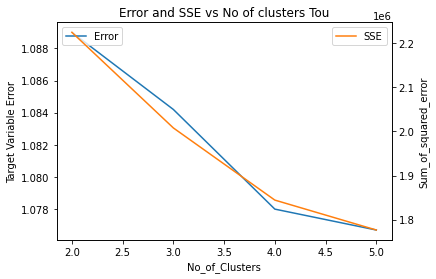

In [488]:
ax = error_plot.plot(x='No_of_Clusters', y='Target Variable Error')
ax2 =error_plot.plot(x='No_of_Clusters', y='Sum_of_squared_Errors',secondary_y=True, ax=ax)
# set the axis labels and title
ax.set_xlabel('No_of_Clusters')
ax.set_ylabel('Target Variable Error')
ax2.set_ylabel('Sum_of_squared_error')
ax.set_title('Error and SSE vs No of clusters Tou')
ax.legend(['Error'], loc='upper left')
ax2.legend(['SSE'], loc='upper right')
plt.show()

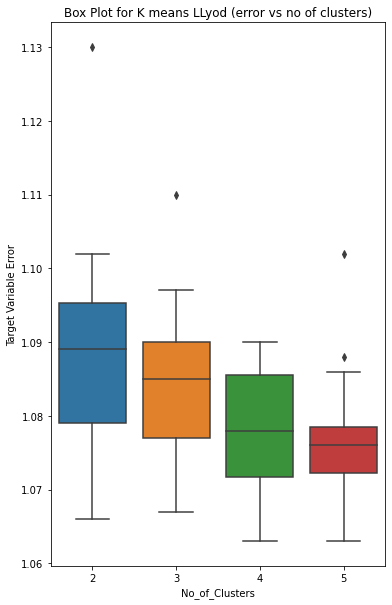

In [593]:
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_df['No_of_Clusters'],y=error_values_df['Target Variable Error'])
plt.title('Box Plot for K means LLyod (error vs no of clusters)')
plt.show()
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_df['No_of_Clusters'],y=error_values_df['Sum_of_squared_Errors'])
plt.title('Box Plot for K means LLyod (SSE vs no of clusters)')
plt.show()
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_df['No_of_Clusters'],y=error_values_df['run_time'])
plt.title('Box Plot for K means LLyod (Run Time vs no of clusters)')
plt.show()


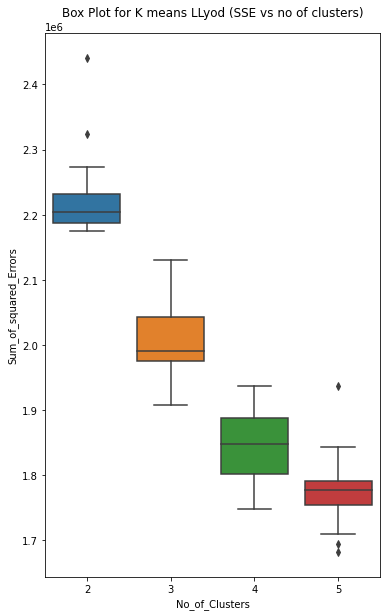

In [595]:
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_df['No_of_Clusters'],y=error_values_df['Sum_of_squared_Errors'])
plt.title('Box Plot for K means LLyod (SSE vs no of clusters)')
plt.show()

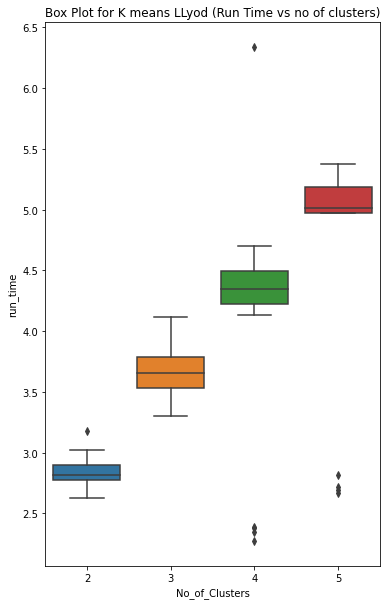

In [597]:
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_df['No_of_Clusters'],y=error_values_df['run_time'])
plt.title('Box Plot for K means LLyod (Run Time vs no of clusters)')
plt.show()

# K means ++ Initialization Code

In [458]:

import numpy as np
import swifter
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
import time

def kmeans_pp_init(input_dataframe,no_of_clusters):
    '''
    K-means++ is a variant of the K-means algorithm that aims to improve the initial centroids' selection 
    in the clustering process. 
    The standard K-means algorithm initializes the cluster centroids randomly, 
    which can lead to suboptimal clustering results, 
    especially if the dataset has complex or irregular structures.
    '''
    list_of_centroids=[]
    #Choosing the first centroid randomly
    centroid = input_dataframe.apply(lambda x: float(x.sample()))
    list_of_centroids.append(centroid)
    
    iterator=2
    while iterator<=no_of_clusters:
        '''
        Calculating the distances from the centroid to every data point
        If the no of centroids are more than 1 calculate the distance from every centroid and take minimum distance
        '''
        distances = np.array(np.amin(cdist(input_dataframe,list_of_centroids,metric='euclidean'),axis=1))
        #Next centroid will be selected with probability proportional to the distance
        
        probs = distances / np.sum(distances)
        '''
        Selection of the next centroids
        '''
        next_centroid = input_dataframe.iloc[np.random.choice(len(input_dataframe),p=probs)]
        list_of_centroids.append(next_centroid)
        iterator+=1
    
    centroid_df=pd.concat(list_of_centroids,axis=1,ignore_index=True)
    #Naming the column as Label for ease of purpose
    centroid_df.index.name='Cluster_Assigned'   
    
        
    return centroid_df

def get_labels(input_dataframe,centroid_df):
    '''
    This function takes centroids as input and takes the initial dataframe and gives them labels to which cluster
    they belong to
    '''
    euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
    #Here we use idxmin functionality to handle ties in the dataset 
    #and it randomly assigns if euclideab distance results in a tie
    '''
    This function returns the index of minimum distances as a dataframe
    '''
    return pd.DataFrame(euclidean_distances.idxmin(axis=1))

        
def get_new_centroids(df_clustered_label,input_dataframe):
    '''
    The input dataframe is the dataframe with clusters labelled and the original dataframe
    '''
    df_original_label_join=input_dataframe.join(df_clustered_label)
    #This is a dataframe that consists of datapoints as well as the cluster assigned 
    df_original_label_join.rename(columns={0:'Cluster_Assigned'},inplace=True)
    #To get the new centroids we group by the Label column and take its mean
    new_centroids=df_original_label_join.groupby('Cluster_Assigned').mean()
    #Here transpose is taken to maintain consistency between original random centroids and 
    return new_centroids.T


def kmeans_plus_plus(input_dataframe,no_of_clusters,threshold,no_of_iterations):
    '''
    This function takes original dataframe,number of clusters,threshold as input.
    '''
    start_time=time.time()
    iteration=0
    #Step 1 of k means ++ is to get K means plus plus initialization centroids
    initial_centroid=kmeans_pp_init(input_dataframe,no_of_clusters)
    #Randomly generated centroids would be stored on centroids 
    #Storing the column list to handle K ties 
    initial_centroid_column_list=initial_centroid.columns.to_list()
    
    while True:
        '''
        The while loop runs until convergence condition is met
        '''
        df_cluster_label=get_labels(input_dataframe,initial_centroid)
        df_new_centroids=get_new_centroids(df_cluster_label,input_dataframe)
        '''
        Handling (Maintaining K Centroids)
        '''
        new_list_of_columns=df_new_centroids.columns.to_list()
        #Keeping the number of clusters same
        initial_set_columns = set(initial_centroid_column_list)
        new_set_columns = set(new_list_of_columns)
        missing_columns = initial_set_columns - new_set_columns
        for col in missing_columns:
            df_new_centroids[col]=initial_centroid[col]
        
        from scipy.spatial.distance import euclidean
        scalar_product = [euclidean(initial_centroid[col],df_new_centroids[col]) for col in initial_centroid.columns]
        threshold_calculated=float(sum(scalar_product))/no_of_clusters
        
        iteration+=1
        
        if threshold_calculated<threshold:
            print("The input Threshold was {}".format(threshold))
            print("The calculated threshold is {}".format(threshold_calculated))
        
        if iteration>no_of_iterations:
            print("Limit for iterations has exceeded")
        
        if threshold_calculated<threshold or iteration>no_of_iterations:
            error=cluster_error_target_variable(df_cluster_label,input_dataframe,no_of_clusters,df_new_centroids)
            sum_of_square_error=sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters)
            end_time=time.time()
            return df_new_centroids,error,sum_of_square_error,end_time-start_time
            break
        else:
            initial_centroid= df_new_centroids
        

def sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters):
    '''
    This function calculates the euclidean distance between new formed 
    centroids and the datapoints in that cluster
    '''
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)
    total_error=[]
    for cluster in range(no_of_clusters):
        df_data_label_cluster=df_data_label[df_data_label['Cluster_Assigned']==cluster]
        df_data_label_cluster=df_data_label_cluster.drop('Cluster_Assigned',axis=1)
        centroids=pd.DataFrame(df_new_centroids[cluster])
        euclidean_distance=cdist(df_data_label_cluster,centroids.T,metric='euclidean')
        total_error.append(sum(euclidean_distance))
    return round(float(''.join(map(str, sum(total_error)))),3)
        
        
        
def cluster_error_target_variable(df_cluster_label,input_dataframe,no_of_clusters,df_new_centroids):
    '''
    This calculates the error for every cluster and sums up the error based on the formula for error
    '''
    
    target_variable_centroid=input_dataframe.groupby('readmitted').mean().reset_index()
    '''
    Target variable centroid is input dataframe taking mean
    '''
    new_centroids= df_new_centroids.T
    #
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)

    # Get the columns of the data dataframe
    columns = input_dataframe.columns

    sum_of_square_Error= []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):   
        s=[]
        for j in range(len(target_variable_centroid)): ### mean centroid
            #Calculating the error between target variable centroid and new centroids
            distance = np.sum(np.square(target_variable_centroid[target_variable_centroid['readmitted']==j][columns] - new_centroids.iloc[i][columns]), axis=1)
            #Storing the distance
            s.append(distance.iloc[0])
        sum_of_square_Error.append(s)
    
    
    merged_new_label=pd.DataFrame(sum_of_square_Error).idxmin(axis=1)
    
    #Merging of cluster
    mapping_dictionary=merged_new_label.to_dict() 
    
    #Getting clusters to a new column
    df_data_label['target_variable_cluster']=df_data_label['Cluster_Assigned'].replace(mapping_dictionary)
    
    
    total_cluster_error = []
    
    for class_name in range(0,2):
        df_cluster = df_data_label[df_data_label['target_variable_cluster'] == class_name] 
        yi = len(df_cluster[df_cluster['readmitted'] == 1]) 
        #Calculating Ni
        ni = len(df_cluster[df_cluster['readmitted'] == 0]) 
        if yi == 0 and ni == 0:
            error_ci = 0
        else:
            error_ci = ni / (ni + yi) # calculate the error rate of the current cluster
        total_cluster_error.append(error_ci)
    return round(sum(total_cluster_error),3)

# Calling K means ++ Multiple times

In [459]:
error_values_kmeans_plus_plus=[]
for no_of_clusters in range(2,6):
    #Taking the cluster value from 2 to 5
    for no_of_experiments in range(1,21):
        #Performing experiments for each cluster 20 times
        final_centroids,error_target_variable,sum_of_squared_error,run_time=kmeans_plus_plus(df_diabetes_final,no_of_clusters,10,100)
        #Storing the variables in dataframe
        error_values_kmeans_plus_plus.append([no_of_clusters,no_of_experiments,error_target_variable,sum_of_squared_error,run_time])
error_values_kmeans_plus_plus_df= pd.DataFrame(error_values_kmeans_plus_plus,columns=['No_of_Clusters', 'Iteration Number', 'Target Variable Error','Sum_of_squared_Errors','run_time'])  


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.479223426617091


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 1.2315261272757745


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.8801684153366605


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.082858788551224


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.504903823218614


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.289202604262189


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 0.7329514523492144


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 1.651867849152767


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.42660746895452


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 1.38469153994658


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.788064467342852


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.6684245443758705


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.872121910740179


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.0982879633583797


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.270124196174781


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.119287650877851


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.9200473710280943


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.5164539875736116


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 7.20450714731439


Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.0377822005674053


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.935717270563568


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.439390241871835


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.92554642973725


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.747360487074459


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.494767990522493


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.5324432404154393


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.7795167431003676


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.912720713623083


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.864443788461016


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.430228580792583


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.3916442925695613


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.21311985436607


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.521259678383934


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.830809328447483


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.402625213051335


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.43073948154365


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 9.16346556650981


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.7092849916255894


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.3844170249749053


Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.5995956305286803


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.9802704191783955


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.83277998442724


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.2577264568171085


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.3484058311261435


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.4614086714328876


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.5983511675978246


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.446051468837842


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.746394378183597


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 9.763422974216368


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.9041692355560036


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.0341315065774905


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.604820604041827


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.3134995596609507


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.6110926110873844


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 7.340286876357835


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 9.38860448042669


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.7596174484645646


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 6.274699602043944


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.878815412661808


Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.780695391000128


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.420903901477913


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 9.09312685025103


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.493674011141535


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.106162004863366


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.66531643805484


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.9977401271894513


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 1.308436362147012


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.8210019247361267


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 4.146539996150747


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.7182880229530895


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.5423747493975704


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.331771407682619


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.0522701135211676


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.4700133954988623


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.283191276223437


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.989061870111268


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.072097046232045


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 3.067825697480931


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 5.31777823264195


Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 2.5699807103581636


In [461]:
error_plot_kmeans_plus_plus=error_values_kmeans_plus_plus_df.groupby(['No_of_Clusters']).mean().reset_index()[['No_of_Clusters','Target Variable Error','Sum_of_squared_Errors','run_time']]
error_plot_kmeans_plus_plus

,No_of_Clusters,Target Variable Error,Sum_of_squared_Errors,run_time
0,2,1.08015,2.215528e+06,2.560751
1,3,1.08020,1.977785e+06,3.004438
2,4,1.07800,1.851552e+06,3.331121
3,5,1.08110,1.705221e+06,4.015893


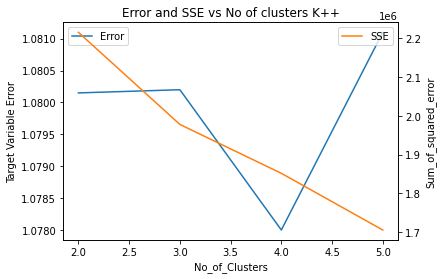

In [605]:
ax = error_plot_kmeans_plus_plus.plot(x='No_of_Clusters', y='Target Variable Error')
ax2=error_plot_kmeans_plus_plus.plot(x='No_of_Clusters', y='Sum_of_squared_Errors',secondary_y=True, ax=ax)
# set the axis labels and title
ax.set_xlabel('No_of_Clusters')
ax.set_ylabel('Target Variable Error')
ax2.set_ylabel('Sum_of_squared_error')
ax.set_title('Error and SSE vs No of clusters K++')
ax.legend(['Error'], loc='upper left')
ax2.legend(['SSE'], loc='upper right')
plt.show()

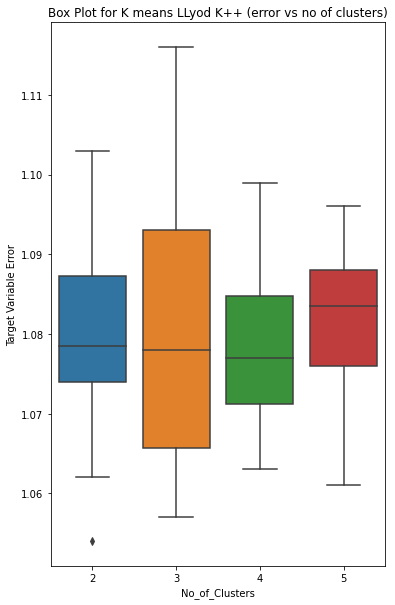

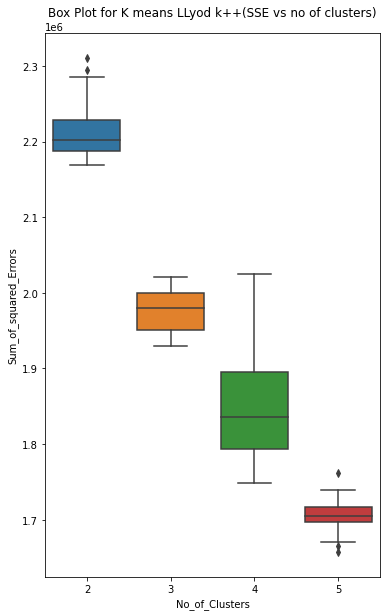

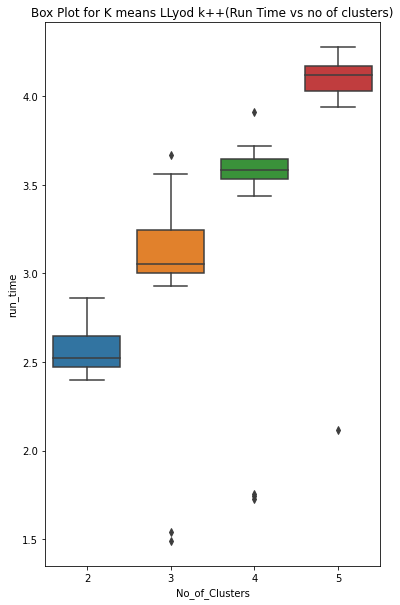

In [606]:
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_kmeans_plus_plus_df['No_of_Clusters'],y=error_values_kmeans_plus_plus_df['Target Variable Error'])
plt.title('Box Plot for K means LLyod K++ (error vs no of clusters)')
plt.show()
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_kmeans_plus_plus_df['No_of_Clusters'],y=error_values_kmeans_plus_plus_df['Sum_of_squared_Errors'])
plt.title('Box Plot for K means LLyod k++(SSE vs no of clusters)')
plt.show()
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_kmeans_plus_plus_df['No_of_Clusters'],y=error_values_kmeans_plus_plus_df['run_time'])
plt.title('Box Plot for K means LLyod k++(Run Time vs no of clusters)')
plt.show()


# Comparing error values between K means and K means ++

In [463]:
error_plot_kmeans_plus_plus

,No_of_Clusters,Target Variable Error,Sum_of_squared_Errors,run_time
0,2,1.08015,2.215528e+06,2.560751
1,3,1.08020,1.977785e+06,3.004438
2,4,1.07800,1.851552e+06,3.331121
3,5,1.08110,1.705221e+06,4.015893


In [607]:
diff_error=error_plot['Sum_of_squared_Errors']-error_plot_kmeans_plus_plus['Sum_of_squared_Errors']
diff_error

0     9035.03725
1    30161.40420
2    -7083.35030
3    71473.21780
Name: Sum_of_squared_Errors, dtype: float64

# Observations
We can easily conclude by initializing K means using K means ++ there is a significant decrease in the Sum of Squared Errors

# K means with SSE as convergence Criteria

In [468]:

import numpy as np
import swifter
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
import time

         
def get_random_centroids(input_dataframe,no_of_clusters):
    '''
    The function takes a dataframe as an input and creates a random K centroids from uniform distribution
    '''
    #Initialize random centroids from dataset
    list_of_centroids = []
    
    for cluster in range(no_of_clusters):
        #Generates a centroids randomly from uniform distribution 
        random_centroid = input_dataframe.swifter.apply(lambda x:float(x.sample()))
        #From the given dataset it randomly selects centroids
        list_of_centroids.append(random_centroid)
    
    centroid_df=pd.concat(list_of_centroids,axis=1)
    #Naming the column as Label for ease of purpose
    centroid_df.index.name='Cluster_Assigned'
    '''
    The function returns a dataframe consisting of no of clusters required
    '''
    return centroid_df

def get_labels(input_dataframe,centroid_df):
    '''
    This function takes centroids as input and takes the initial dataframe and gives them labels to which cluster
    they belong to
    '''
    euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
    #Here we use idxmin functionality to handle ties in the dataset 
    #and it randomly assigns if euclideab distance results in a tie
    '''
    This function returns the index of minimum distances as a dataframe
    '''
    return pd.DataFrame(euclidean_distances.idxmin(axis=1))

        
def get_new_centroids(df_clustered_label,input_dataframe):
    '''
    The input dataframe is the dataframe with clusters labelled and the original dataframe
    '''
    df_original_label_join=input_dataframe.join(df_clustered_label)
    #This is a dataframe that consists of datapoints as well as the cluster assigned 
    df_original_label_join.rename(columns={0:'Cluster_Assigned'},inplace=True)
    #To get the new centroids we group by the Label column and take its mean
    new_centroids=df_original_label_join.groupby('Cluster_Assigned').mean()
    #Here transpose is taken to maintain consistency between original random centroids and 
    return new_centroids.T


def kmeans_SSE_Convergence(input_dataframe,no_of_clusters,sum_of_squared_threshold,no_of_iterations):
    '''
    Treats K means as an optimization Problem and stops when difference in SSE reaches a threshold
    The input to the function is the dataframe,no of clusters and a threshold which indicates the perecentage change
    It indicates user can set the percentage change in the SSE and once the percentage change in SSE drops to the 
    Threshold we can see the algorithm has converged
    '''
    start_time=time.time()
    iteration=0
    #Step 1 of k means is to get random _Centroids
    initial_centroid=get_random_centroids(input_dataframe,no_of_clusters)
    #Randomly generated centroids would be stored on centroids 
    #Storing the column list to handle K ties 
    initial_centroid_column_list=initial_centroid.columns.to_list()
    #Get initial labels
    df_cluster_label=get_labels(input_dataframe,initial_centroid)
    #Compute the initial Sum of squared Errors
    initial_sum_of_squared_errors=sum_of_square_error_function(df_cluster_label,input_dataframe,initial_centroid,no_of_clusters)
    
    
    while True:
        '''
        The while loop runs until convergence condition is met
        '''
        
        df_new_centroids=get_new_centroids(df_cluster_label,input_dataframe)
        '''
        Handling (Maintaining K Centroids)
        '''
        new_list_of_columns=df_new_centroids.columns.to_list()
        #Keeping the number of clusters same
        initial_set_columns = set(initial_centroid_column_list)
        new_set_columns = set(new_list_of_columns)
        missing_columns = initial_set_columns - new_set_columns
        for col in missing_columns:
            df_new_centroids[col]=initial_centroid[col]
            
        '''
        Assigning labels to new centroids
        '''
        df_cluster_label_iter=get_labels(input_dataframe,df_new_centroids)
        '''
        Calculating the current SSE
        
        '''
        updated_sum_of_squared_errors=sum_of_square_error_function(df_cluster_label_iter,input_dataframe,df_new_centroids,no_of_clusters)
        
        #Calculating the convergence criteria
        
        percentage_change=((initial_sum_of_squared_errors-updated_sum_of_squared_errors)/(initial_sum_of_squared_errors))*100
        
        iteration+=1
        #Stopping criteria
        #Indicating new clusters have reduced the SSE
        if percentage_change>0:
            if percentage_change>=sum_of_squared_threshold or iteration>no_of_iterations:
                print("The input SSE Threshold was {}".format(sum_of_squared_threshold))
                print("The percentage change is {}".format(percentage_change))
                print("The initial error was {} and final error was {}".format(initial_sum_of_squared_errors,updated_sum_of_squared_errors))
                error=cluster_error_target_variable(df_cluster_label_iter,input_dataframe,no_of_clusters,df_new_centroids)
                end_time=time.time()
                return df_new_centroids,error,updated_sum_of_squared_errors,end_time-start_time
                break
                
        else:
            initial_centroid= df_new_centroids
            df_cluster_label=df_cluster_label_iter
            initial_sum_of_squared_errors=updated_sum_of_squared_errors
        

def sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters):
    '''
    This function calculates the euclidean distance between new formed 
    centroids and the datapoints in that cluster
    '''
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)
    total_error=[]
    for cluster in range(no_of_clusters):
        df_data_label_cluster=df_data_label[df_data_label['Cluster_Assigned']==cluster]
        df_data_label_cluster=df_data_label_cluster.drop('Cluster_Assigned',axis=1)
        centroids=pd.DataFrame(df_new_centroids[cluster])
        euclidean_distance=cdist(df_data_label_cluster,centroids.T,metric='euclidean')
        total_error.append(sum(euclidean_distance))
    return round(float(''.join(map(str, sum(total_error)))),3)
        
        
        
def cluster_error_target_variable(df_cluster_label,input_dataframe,no_of_clusters,df_new_centroids):
    '''
    This calculates the error for every cluster and sums up the error based on the formula for error
    '''
    
    target_variable_centroid=input_dataframe.groupby('readmitted').mean().reset_index()
    '''
    Target variable centroid is input dataframe taking mean
    '''
    new_centroids= df_new_centroids.T
    #
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)

    # Get the columns of the data dataframe
    columns = input_dataframe.columns

    sum_of_square_Error= []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):   
        s=[]
        for j in range(len(target_variable_centroid)): ### mean centroid
            #Calculating the error between target variable centroid and new centroids
            distance = np.sum(np.square(target_variable_centroid[target_variable_centroid['readmitted']==j][columns] - new_centroids.iloc[i][columns]), axis=1)
            #Storing the distance
            s.append(distance.iloc[0])
        sum_of_square_Error.append(s)
    
    
    merged_new_label=pd.DataFrame(sum_of_square_Error).idxmin(axis=1)
    
    #Merging of cluster
    mapping_dictionary=merged_new_label.to_dict() 
    
    #Getting clusters to a new column
    df_data_label['target_variable_cluster']=df_data_label['Cluster_Assigned'].replace(mapping_dictionary)
    
    
    total_cluster_error = []
    
    for class_name in range(0,2):
        df_cluster = df_data_label[df_data_label['target_variable_cluster'] == class_name] 
        yi = len(df_cluster[df_cluster['readmitted'] == 1]) 
        #Calculating Ni
        ni = len(df_cluster[df_cluster['readmitted'] == 0]) 
        if yi == 0 and ni == 0:
            error_ci = 0
        else:
            error_ci = ni / (ni + yi) # calculate the error rate of the current cluster
        total_cluster_error.append(error_ci)
    return round(sum(total_cluster_error),3)

# Calling K means with convergence multiple times

In [469]:
error_values_kmeans_convergence=[]
for no_of_clusters in range(2,6):
    #Taking the cluster value from 2 to 5
    for no_of_experiments in range(1,21):
        #Performing experiments for each cluster 20 times
        final_centroids,error_target_variable,sum_of_squared_error,run_time=kmeans_SSE_Convergence(df_diabetes_final,no_of_clusters,10,100)
        #Storing the variables in dataframe
        error_values_kmeans_convergence.append([no_of_clusters,no_of_experiments,error_target_variable,sum_of_squared_error,run_time])
error_values_kmeans_convergence_df= pd.DataFrame(error_values_kmeans_convergence,columns=['No_of_Clusters', 'Iteration Number', 'Target Variable Error','Sum_of_squared_Errors','run_time'])  


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 42.04948503985223
The initial error was 4164191.655 and final error was 2413170.508


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 10.841692349850437
The initial error was 2565750.503 and final error was 2287579.727


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 15.782500864006757
The initial error was 2591542.212 and final error was 2182532.04


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 25.89293894811145
The initial error was 2997831.801 and final error was 2221605.043


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 19.093643954963248
The initial error was 2706214.289 and final error was 2189499.368


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 10.940963242363823
The initial error was 2556782.148 and final error was 2277045.553


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 21.161189463403552
The initial error was 2922064.613 and final error was 2303720.984


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 13.024795545034115
The initial error was 2495030.374 and final error was 2170057.769


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 16.021881769404093
The initial error was 2620200.174 and final error was 2200394.8


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 10.449668657300807
The initial error was 2532007.049 and final error was 2267420.702


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 39.50197058606561
The initial error was 3626013.664 and final error was 2193666.813


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 33.54771564709272
The initial error was 3380602.566 and final error was 2246487.63


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 10.453625433357065
The initial error was 2424485.664 and final error was 2171039.014


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 14.412577289782044
The initial error was 2540928.209 and final error was 2174714.967


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 17.39722640016049
The initial error was 2627446.936 and final error was 2170344.044


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 13.370053983908056
The initial error was 2527920.354 and final error was 2189936.038


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 20.75243232514677
The initial error was 2952864.365 and final error was 2340073.186


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 21.896022234280935
The initial error was 2859539.652 and final error was 2233414.214


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 23.465787331666657
The initial error was 2893281.855 and final error was 2214350.488


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/2 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 11.808370448463885
The initial error was 2479746.992 and final error was 2186929.281


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 14.305728885507909
The initial error was 2258290.043 and final error was 1935225.192


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 30.70455576239761
The initial error was 2942935.195 and final error was 2039320.017


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 25.42627496409925
The initial error was 2639587.226 and final error was 1968438.52


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 19.190304513670608
The initial error was 2469849.411 and final error was 1995877.788


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 13.17740095938887
The initial error was 2259626.985 and final error was 1961866.877


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 14.204562388083444
The initial error was 2405728.798 and final error was 2064005.55


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 14.053145665121672
The initial error was 2240624.964 and final error was 1925746.674


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 13.78142815705996
The initial error was 2271883.374 and final error was 1958785.399


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 27.398959902939694
The initial error was 2691604.377 and final error was 1954132.773


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 10.49774508674207
The initial error was 2189523.913 and final error was 1959673.274


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 15.256416156064539
The initial error was 2321148.613 and final error was 1967024.521


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 16.75296353833023
The initial error was 2478324.871 and final error was 2063132.009


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 17.73329547704827
The initial error was 2403729.434 and final error was 1977468.991


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 15.693883140538457
The initial error was 2383703.744 and final error was 2009608.064


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 30.02750636215033
The initial error was 2954872.024 and final error was 2067597.639


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 25.651562347864264
The initial error was 2878052.931 and final error was 2139787.389


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 42.4589612856325
The initial error was 3471772.927 and final error was 1997694.204


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 31.6351065646439
The initial error was 2970639.214 and final error was 2030874.333


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 10.437553340941662
The initial error was 2171148.866 and final error was 1944534.045


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 12.563712867193114
The initial error was 2441688.498 and final error was 2134921.766


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 17.315135992765583
The initial error was 2302310.852 and final error was 1903662.597


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 18.753285416080033
The initial error was 2286070.795 and final error was 1857357.414


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 18.64441526185205
The initial error was 2309276.22 and final error was 1878725.172


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 15.862828203101195
The initial error was 2235216.006 and final error was 1880647.531


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 19.417971147529727
The initial error was 2310561.812 and final error was 1861897.586


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 24.382344767891727
The initial error was 2390942.387 and final error was 1807974.571


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 20.386132525092858
The initial error was 2493222.294 and final error was 1984950.693


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 27.296050507998203
The initial error was 2509704.057 and final error was 1824653.97


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 24.51837477805195
The initial error was 2548985.537 and final error was 1924015.71


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 16.56396124925511
The initial error was 2196254.969 and final error was 1832468.147


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 12.633021123729387
The initial error was 2313592.506 and final error was 2021315.876


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 18.01369021395754
The initial error was 2308396.209 and final error was 1892568.867


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 17.793245548570184
The initial error was 2267585.393 and final error was 1864108.356


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 19.11697721090092
The initial error was 2240620.519 and final error was 1812281.605


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 27.74049355212402
The initial error was 2492070.888 and final error was 1800758.124


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 14.130552706825906
The initial error was 2124641.953 and final error was 1824418.302


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 23.517744476217437
The initial error was 2481536.308 and final error was 1897934.94


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 19.696968136191337
The initial error was 2262856.953 and final error was 1817142.74


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 24.619709090565866
The initial error was 2565795.029 and final error was 1934103.757


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/4 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 13.591127135993904
The initial error was 2244030.697 and final error was 1939041.632


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 27.134080443981563
The initial error was 2392671.649 and final error was 1743442.199


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 22.136431686718886
The initial error was 2133054.124 and final error was 1660872.055


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 21.06236795121548
The initial error was 2290780.268 and final error was 1808287.699


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 14.016241567794689
The initial error was 2062072.358 and final error was 1773047.315


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 17.442314097524267
The initial error was 2234218.578 and final error was 1844519.156


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 23.626646132841227
The initial error was 2279470.044 and final error was 1740907.723


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 16.016159717518256
The initial error was 2117024.63 and final error was 1777958.584


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 36.1580141041149
The initial error was 2790915.295 and final error was 1781775.749


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 15.95707031914506
The initial error was 2112127.698 and final error was 1775093.996


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 19.362459837776928
The initial error was 2083761.022 and final error was 1680293.631


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 14.63169386622135
The initial error was 1979405.875 and final error was 1689785.267


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 25.042927112238438
The initial error was 2400756.646 and final error was 1799536.909


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 13.351319803524095
The initial error was 2040839.565 and final error was 1768360.548


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 19.369784856166046
The initial error was 2204143.067 and final error was 1777205.297


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 23.175027858425644
The initial error was 2301270.567 and final error was 1767950.472


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 17.08505660138902
The initial error was 2104093.24 and final error was 1744607.719


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 17.669217668490965
The initial error was 2038652.926 and final error was 1678438.903


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 15.68077033374393
The initial error was 2135058.386 and final error was 1800264.784


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 24.04723330083937
The initial error was 2491964.142 and final error was 1892715.711


Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/31 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/5 [00:00<?, ?it/s]

The input SSE Threshold was 10
The percentage change is 26.43970753685756
The initial error was 2389568.115 and final error was 1757773.294


In [598]:
error_values_kmeans_convergence_df

,No_of_Clusters,Iteration Number,Target Variable Error,Sum_of_squared_Errors,run_time
0,2,1,1.066,2413170.508,2.726349
1,2,2,1.078,2287579.727,2.718648
2,2,3,1.087,2182532.040,2.797202
3,2,4,1.104,2221605.043,2.712034
4,2,5,1.091,2189499.368,2.718228
5,2,6,1.079,2277045.553,2.694952
6,2,7,1.061,2303720.984,2.644690
7,2,8,1.088,2170057.769,2.651664
8,2,9,1.095,2200394.800,2.699285
9,2,10,1.072,2267420.702,2.626602


In [599]:
error_values_kmeans_convergence=error_values_kmeans_convergence_df.groupby(['No_of_Clusters']).mean().reset_index()[['No_of_Clusters','Target Variable Error','Sum_of_squared_Errors','run_time']]
error_values_kmeans_convergence

,No_of_Clusters,Target Variable Error,Sum_of_squared_Errors,run_time
0,2,1.08305,2.231699e+06,2.717397
1,3,1.07885,2.004786e+06,3.387516
2,4,1.07880,1.878001e+06,4.116683
3,5,1.07915,1.763142e+06,4.712107


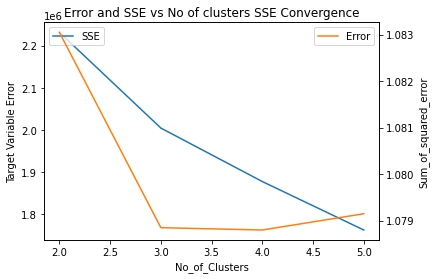

In [602]:
ax = error_values_kmeans_convergence.plot(x='No_of_Clusters', y='Sum_of_squared_Errors')
ax2=error_values_kmeans_convergence.plot(x='No_of_Clusters', y='Target Variable Error',secondary_y=True, ax=ax)
# set the axis labels and title
ax.set_xlabel('No_of_Clusters')
ax.set_ylabel('Target Variable Error')
ax2.set_ylabel('Sum_of_squared_error')
ax.set_title('Error and SSE vs No of clusters SSE Convergence')
ax.legend(['SSE'], loc='upper left')
ax2.legend(['Error'], loc='upper right')
plt.show()

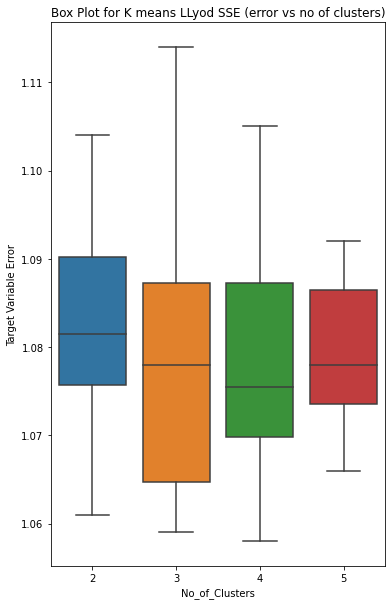

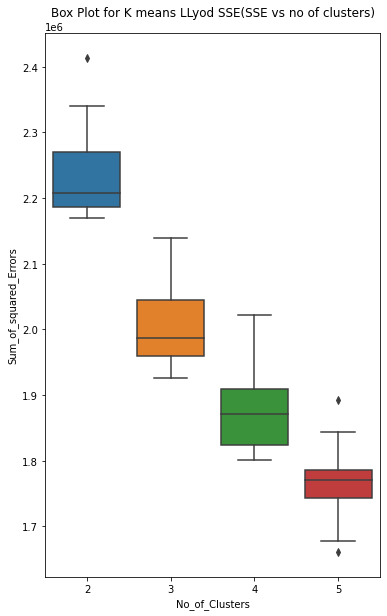

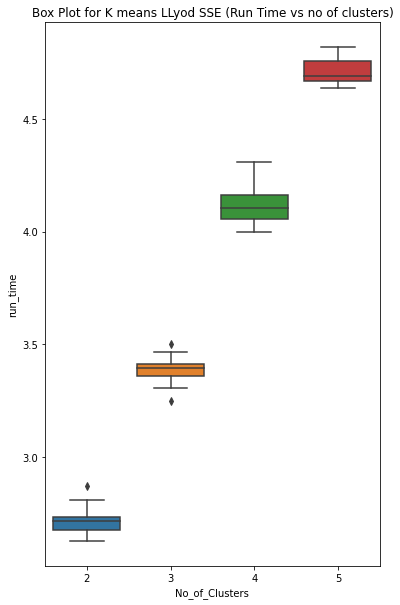

In [604]:
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_kmeans_convergence_df['No_of_Clusters'],y=error_values_kmeans_convergence_df['Target Variable Error'])
plt.title('Box Plot for K means LLyod SSE (error vs no of clusters)')
plt.show()
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_kmeans_convergence_df['No_of_Clusters'],y=error_values_kmeans_convergence_df['Sum_of_squared_Errors'])
plt.title('Box Plot for K means LLyod SSE(SSE vs no of clusters)')
plt.show()
import seaborn as sns
plt.figure(figsize=(6, 10))
#Plotting Box plot
#Plotting values of errors for 80 iterations
sns.boxplot(x=error_values_kmeans_convergence_df['No_of_Clusters'],y=error_values_kmeans_convergence_df['run_time'])
plt.title('Box Plot for K means LLyod SSE (Run Time vs no of clusters)')
plt.show()


# Run time comparison between K means and K means++

In [472]:
error_values_kmeans_convergence['Algorithm_Used']='K_Means_SSE_Convergence'
error_plot_kmeans_plus_plus['Algorithm_Used']='K++Initialization'
error_plot['Algorithm_Used']='Llyod_Kmeans'

In [473]:
k_means_metric=pd.concat([error_values_kmeans_convergence,error_plot_kmeans_plus_plus,error_plot],axis=0)

In [474]:
k_means_metric

,No_of_Clusters,Target Variable Error,Sum_of_squared_Errors,run_time,Algorithm_Used
0,2,1.08305,2.231699e+06,2.717397,K_Means_SSE_Convergence
1,3,1.07885,2.004786e+06,3.387516,K_Means_SSE_Convergence
2,4,1.07880,1.878001e+06,4.116683,K_Means_SSE_Convergence
3,5,1.07915,1.763142e+06,4.712107,K_Means_SSE_Convergence
0,2,1.08015,2.215528e+06,2.560751,K++Initialization
1,3,1.08020,1.977785e+06,3.004438,K++Initialization
2,4,1.07800,1.851552e+06,3.331121,K++Initialization
3,5,1.08110,1.705221e+06,4.015893,K++Initialization
0,2,1.07845,2.224360e+06,3.045261,Llyod_Kmeans
1,3,1.07930,1.990909e+06,4.056636,Llyod_Kmeans


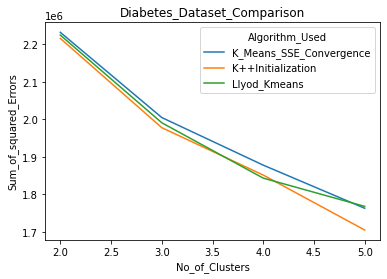

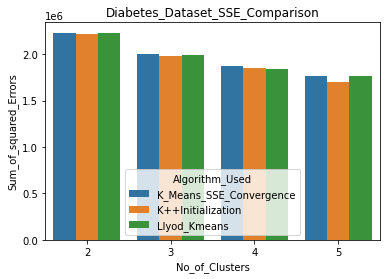

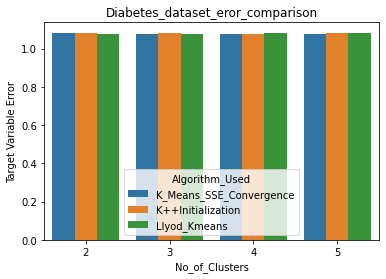

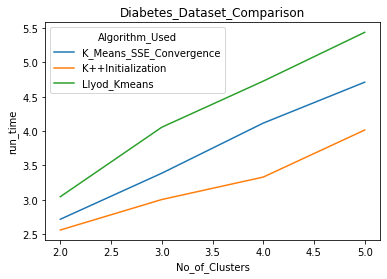

In [612]:
sns.lineplot(x="No_of_Clusters", y="Sum_of_squared_Errors", hue="Algorithm_Used", data=k_means_metric)
plt.title('Diabetes_Dataset_Comparison')
plt.show()
sns.barplot(x="No_of_Clusters", y="Sum_of_squared_Errors", hue="Algorithm_Used", data=k_means_metric)
plt.title('Diabetes_Dataset_SSE_Comparison')
plt.show()
sns.barplot(x="No_of_Clusters", y="Target Variable Error", hue="Algorithm_Used", data=k_means_metric)
plt.title('Diabetes_dataset_eror_comparison')
plt.show()
sns.lineplot(x="No_of_Clusters", y="run_time", hue="Algorithm_Used", data=k_means_metric)
plt.title('Diabetes_Dataset_Comparison')
plt.show()

# K means with library

100%|██████████| 15/15 [01:13<00:00,  4.88s/it]


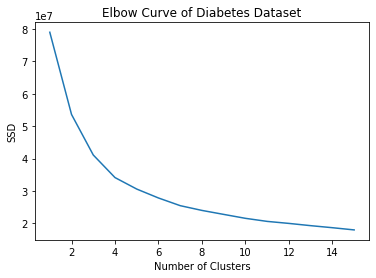

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm

# Load data from CSV file
data = df_diabetes_final
columns=df_diabetes_final.columns

#Extract features
X = data[['age', 'admission_type_id', 'discharge_disposition_id','admission_source_id', 'time_in_hospital', 'num_lab_procedures','num_procedures', 'num_medications','number_outpatient','number_emergency', 
        'number_inpatient', 'number_diagnoses','max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride', 'glipizide',
       'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'gender_Female', 'gender_Male',
       'race_AfricanAmerican', 'race_Asian', 'race_Caucasian', 'race_Hispanic',
       'race_Other']]

# Create a list to hold the Sum of Squared Distances (SSD)
ssd = []

# Create KMeans objects for k=1 to k=10
for k in tqdm(range(1, 16)):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1,16), ssd)
plt.title('Elbow Curve of Diabetes Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.show()


# Ball K means

In [492]:
df_sample=df_diabetes_final[['readmitted','num_medications','num_lab_procedures']]
df_sample=df_sample.head(10)

In [504]:

import numpy as np
import swifter
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
import time

         
def get_random_centroids(input_dataframe,no_of_clusters):
    '''
    The function takes a dataframe as an input and creates a random K centroids from uniform distribution
    '''
    #Initialize random centroids from dataset
    list_of_centroids = []
    
    for cluster in range(no_of_clusters):
        #Generates a centroids randomly from uniform distribution 
        random_centroid = input_dataframe.swifter.apply(lambda x:float(x.sample()))
        #From the given dataset it randomly selects centroids
        list_of_centroids.append(random_centroid)
    
    centroid_df=pd.concat(list_of_centroids,axis=1)
    #Naming the column as Label for ease of purpose
    centroid_df.index.name='Cluster_Assigned'
    '''
    The function returns a dataframe consisting of no of clusters required
    '''
    return centroid_df

def get_labels(input_dataframe,centroid_df):
    '''
    This function takes centroids as input and takes the initial dataframe and gives them labels to which cluster
    they belong to
    '''
    euclidean_distances = centroid_df.swifter.apply(lambda x: np.sqrt(((input_dataframe - x) ** 2).sum(axis=1)))
    #Here we use idxmin functionality to handle ties in the dataset 
    #and it randomly assigns if euclideab distance results in a tie
    '''
    This function returns the index of minimum distances as a dataframe
    '''
    return pd.DataFrame(euclidean_distances.idxmin(axis=1))

        
def get_new_centroids(df_clustered_label,input_dataframe):
    '''
    The input dataframe is the dataframe with clusters labelled and the original dataframe
    '''
    df_original_label_join=input_dataframe.join(df_clustered_label)
    #This is a dataframe that consists of datapoints as well as the cluster assigned 
    df_original_label_join.rename(columns={0:'Cluster_Assigned'},inplace=True)
    #To get the new centroids we group by the Label column and take its mean
    new_centroids=df_original_label_join.groupby('Cluster_Assigned').mean()
    #Here transpose is taken to maintain consistency between original random centroids and 
    return new_centroids.T


def kmeans_llyod(input_dataframe,no_of_clusters,threshold,no_of_iterations):
    '''
    This function takes original dataframe,number of clusters,threshold as input.
    '''
    start_time=time.time()
    iteration=0
    #Step 1 of k means is to get random _Centroids
    initial_centroid=get_random_centroids(input_dataframe,no_of_clusters)
    #Randomly generated centroids would be stored on centroids 
    #Storing the column list to handle K ties 
    initial_centroid_column_list=initial_centroid.columns.to_list()
    
    while True:
        '''
        The while loop runs until convergence condition is met
        '''
        df_cluster_label=get_labels(input_dataframe,initial_centroid)
        df_new_centroids=get_new_centroids(df_cluster_label,input_dataframe)
        '''
        Handling (Maintaining K Centroids)
        '''
        new_list_of_columns=df_new_centroids.columns.to_list()
        #Keeping the number of clusters same
        initial_set_columns = set(initial_centroid_column_list)
        new_set_columns = set(new_list_of_columns)
        missing_columns = initial_set_columns - new_set_columns
        for col in missing_columns:
            df_new_centroids[col]=initial_centroid[col]
        
        from scipy.spatial.distance import euclidean
        scalar_product = [euclidean(initial_centroid[col],df_new_centroids[col]) for col in initial_centroid.columns]
        threshold_calculated=float(sum(scalar_product))/no_of_clusters
        
        iteration+=1
        
        if threshold_calculated<threshold:
            print("The input Threshold was {}".format(threshold))
            print("The calculated threshold is {}".format(threshold_calculated))
        
        if iteration>no_of_iterations:
            print("Limit for iterations has exceeded")
        
        if threshold_calculated<threshold or iteration>no_of_iterations:
            error=cluster_error_target_variable(df_cluster_label,input_dataframe,no_of_clusters,df_new_centroids)
            sum_of_square_error=sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters)
            end_time=time.time()
            return df_new_centroids,error,sum_of_square_error,end_time-start_time
            break
        else:
            initial_centroid= df_new_centroids
        

def sum_of_square_error_function(df_cluster_label,input_dataframe,df_new_centroids,no_of_clusters):
    '''
    This function calculates the euclidean distance between new formed 
    centroids and the datapoints in that cluster
    '''
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)
    total_error=[]
    for cluster in range(no_of_clusters):
        df_data_label_cluster=df_data_label[df_data_label['Cluster_Assigned']==cluster]
        df_data_label_cluster=df_data_label_cluster.drop('Cluster_Assigned',axis=1)
        centroids=pd.DataFrame(df_new_centroids[cluster])
        euclidean_distance=cdist(df_data_label_cluster,centroids.T,metric='euclidean')
        total_error.append(sum(euclidean_distance))
    return round(float(''.join(map(str, sum(total_error)))),3)
        
        
        
def cluster_error_target_variable(df_cluster_label,input_dataframe,no_of_clusters,df_new_centroids):
    '''
    This calculates the error for every cluster and sums up the error based on the formula for error
    '''
    
    target_variable_centroid=input_dataframe.groupby('readmitted').mean().reset_index()
    '''
    Target variable centroid is input dataframe taking mean
    '''
    new_centroids= df_new_centroids.T
    #
    df_data_label=input_dataframe.join(df_cluster_label)
    #Renaming the column
    df_data_label.rename(columns={0:'Cluster_Assigned'},inplace=True)

    # Get the columns of the data dataframe
    columns = input_dataframe.columns

    sum_of_square_Error= []
    # Compute the distance between each data point and its assigned centroid
    for i in range(len(new_centroids)):   
        s=[]
        for j in range(len(target_variable_centroid)): ### mean centroid
            #Calculating the error between target variable centroid and new centroids
            distance = np.sum(np.square(target_variable_centroid[target_variable_centroid['readmitted']==j][columns] - new_centroids.iloc[i][columns]), axis=1)
            #Storing the distance
            s.append(distance.iloc[0])
        sum_of_square_Error.append(s)
    
    
    merged_new_label=pd.DataFrame(sum_of_square_Error).idxmin(axis=1)
    
    #Merging of cluster
    mapping_dictionary=merged_new_label.to_dict() 
    
    #Getting clusters to a new column
    df_data_label['target_variable_cluster']=df_data_label['Cluster_Assigned'].replace(mapping_dictionary)
    
    
    total_cluster_error = []
    
    for class_name in range(0,2):
        df_cluster = df_data_label[df_data_label['target_variable_cluster'] == class_name] 
        yi = len(df_cluster[df_cluster['readmitted'] == 1]) 
        #Calculating Ni
        ni = len(df_cluster[df_cluster['readmitted'] == 0]) 
        if yi == 0 and ni == 0:
            error_ci = 0
        else:
            error_ci = ni / (ni + yi) # calculate the error rate of the current cluster
        total_cluster_error.append(error_ci)
    return round(sum(total_cluster_error),3)

In [538]:
df_new_centroids,error,sum_of_square_error,x,y,z=kmeans_llyod(df_sample,3,10,100)

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/3 [00:00<?, ?it/s]

The input Threshold was 10
The calculated threshold is 8.446735541247836


In [539]:
df_new_centroids

Cluster_Assigned,0,1,2
readmitted,0.0,0.5,0.285714
num_medications,13.0,17.0,14.857143
num_lab_procedures,11.0,32.0,58.000000


In [579]:
dist=[]
for i in range(0,3):
    distance=cdist(pd.DataFrame(df_new_centroids[i]).T,df_sample,metric='Euclidean')
    dist.append(distance)
dict={}    
for index,i in enumerate(dist):
    for j in i:
        dict[index]=max(j)  
centroid_df_radius=pd.DataFrame(dict,index=list(dict.keys()))
centroid_df_radius.drop_duplicates(inplace=True)
centroid_df_radius

,0,1,2
0,62.016127,41.306779,47.037545


In [581]:
centroid_df_neighbour=df_new_centroids.copy()

In [584]:
centroid_df_neighbour

Cluster_Assigned,0,1,2
readmitted,0.0,0.5,0.285714
num_medications,13.0,17.0,14.857143
num_lab_procedures,11.0,32.0,58.000000


In [589]:
for i in range(0,3):
    for j in range(i+1,3):
        print(i,j)
        print(i,j,cdist(df_new_centroids[i],df_new_centroids[j].T,method='euclidean'))

0 1


ValueError: XA must be a 2-dimensional array.